In [43]:
%matplotlib inline

In [44]:
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt 
from sklearn import datasets
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

import pandas as pd
import pandas_profiling as pp

from support import plot_event

In [45]:
# options pour pandas
pd.set_option("display.max_columns",30)
pd.set_option('display.max_rows', 30)

## Jeu de données des séries temporelles de pluie

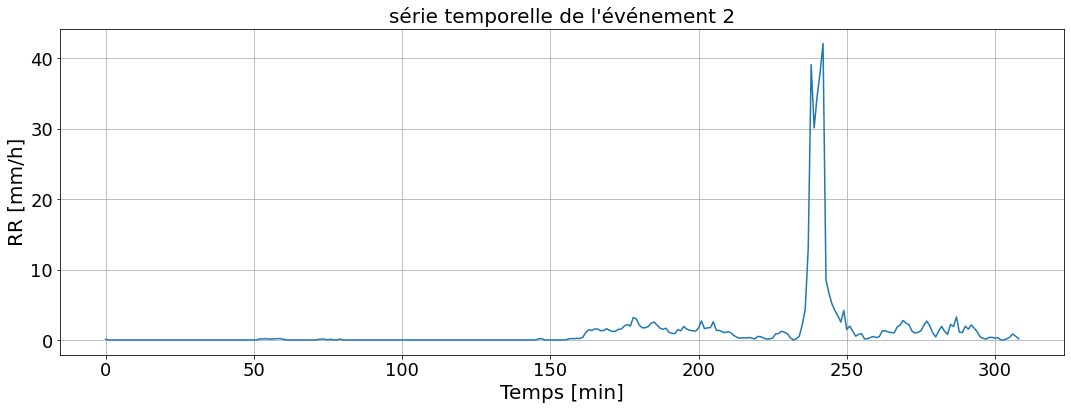

In [46]:
plt.figure(figsize=(18,6))
plot_event(1)
# pour afficher l'événement 2

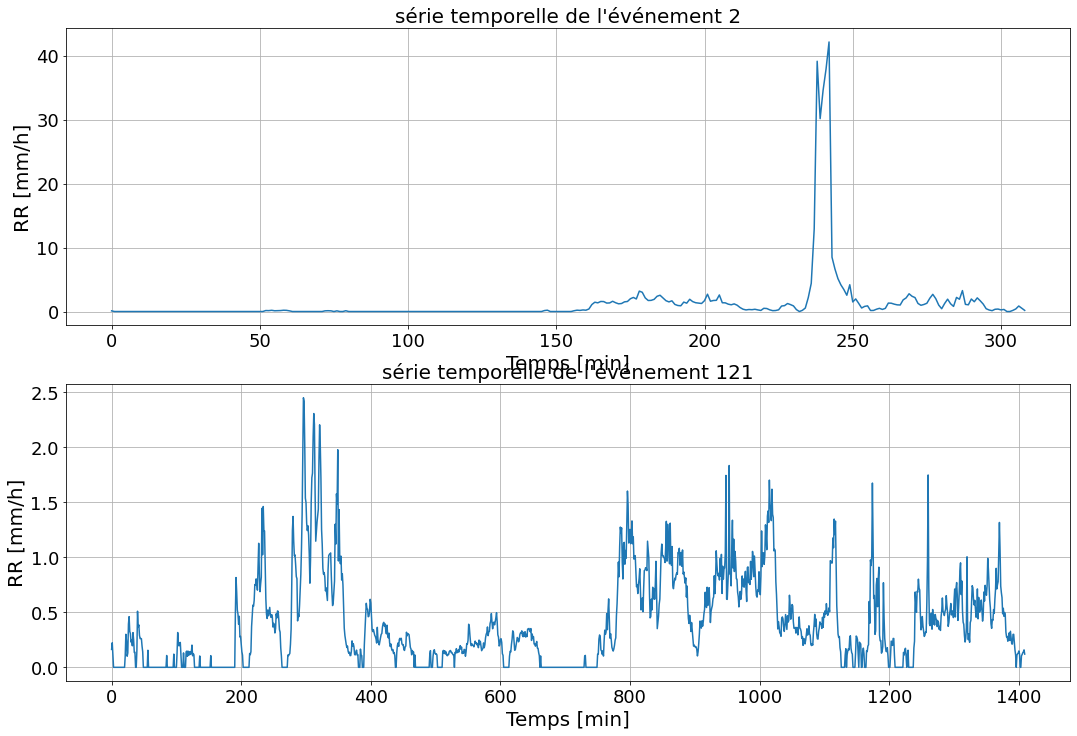

In [47]:
listeDEvenements = [1,120] 
# pour afficher les deux événements 2 et 41
plt.figure(figsize=(18,6*len(listeDEvenements)))
plot_event(listeDEvenements)

Ce jeu de données est composé de 234 événementsde pluie/individus caractérisés par 23 mesures/variables.

In [48]:
nomDesVariables_ = ['Durée de l’événement',
                    'Moyenne du tauxde pluie',
                    'Durée non pluvieuse intra-événement',
                    'premier quartile',
                    'Médiane',
                    'Troisième quartile',
                    'Temps inter-événement précédent',
                    'Moyenne du taux de pluie / pluie',
                    'Écart-type du taux de pluie s/événement',
                    'Mode',
                    'Maximum du taux de pluie',
                    'Pourcentage de non pluie intra évènement',
                    'cumul d’eau',
                    'Coefficient de variation du taux de pluie d’ordre c_1=0.5',
                    'Coefficient de variation du taux de pluie d’ordre c_2=1',
                    'Coefficient de variation du taux de pluie d’ordre c_3=2',
                    'Coefficient de variation normalisé du taux de pluie d’ordre c_N1=1',
                    'Coefficient de variation normalisé du taux de pluie d’ordre c_N2=2',
                    'Coefficient de variation normalisé du taux de pluie d’ordre c_N3=3',
                    'Coefficient de variation du taux de pluie d’ordre C=2 seuillé à S=0.3',
                    'Paramètre de convectivité beta_L1=0.3',
                    'Paramètre de convectivité beta_L2=1',
                    'Paramètre de convectivité beta_L3=3']
nomDesVariables = ['$D_e$',
                    '$R_m$',
                    '$D_d$',
                    '$Q_1$',
                    '$Q_2$',
                    '$Q_3$',
                    '$IET_p$',
                    '$R_{m,r}$',
                    '$\sigma_R$',
                    '$M_0$',
                    '$R_{\max}$',
                    '$D_{d\%e}$',
                    '$R_d$',
                    '$P_{c1}$',
                    '$P_{c2}$',
                    '$P_{c3}$',
                    '$P_{CN_1}$',
                    '$P_{CN_2}$',
                    '$P_{CN_3}$',
                    '$P_{S,C}$',
                    '$\\beta_{L1}$',
                    '$\\beta_{L2}$',
                    '$\\beta_{L3}$']

In [49]:
indices_reduits = [0, 8, 10, 13, 12] 
#choix = "complet"
#choix = "complet_norme"
#choix = "reduit"
choix = "reduit_norme"
if choix == "complet":
    df_pluie=pd.read_csv('x.txt',sep='\s+', 
                     header=None,decimal=',',
                  names=nomDesVariables)
elif choix == "complet_norme":
    #for i in range(len(nomDesVariables)):
    #    nomDesVariables[i] += 'n'
    nomDesVariables = [nomDesVariables[i][:-1]+'n'+nomDesVariables[i][-1] for i in range(len(nomDesVariables))]
    df_pluie=pd.read_csv('xn.txt',sep='\s+', 
                     header=None,decimal=',',
                  names=nomDesVariables)
elif choix == "reduit":
    df_pluie=pd.read_csv('x.txt',sep='\s+', 
                     header=None,decimal=',',
                  names=nomDesVariables)
    df_pluie = df_pluie[[nomDesVariables[i] for i in indices_reduits]]
elif choix == "reduit_norme":
    nomDesVariables = [nomDesVariables[i][:-1]+'n'+nomDesVariables[i][-1] for i in indices_reduits]
        
    df_pluie=pd.read_csv('xn5.txt',sep='\s+', 
                     header=None,decimal=',',
                  names=nomDesVariables)

In [50]:
#pp.ProfileReport(df_pluie)

In [51]:
#df_pluie=df_pluie.iloc[:,[0,8,10,13,12]]
df_pluie.columns

Index(['$D_en$', '$\sigma_Rn$', '$R_{\max}n$', '$P_{c1}n$', '$R_dn$'], dtype='object')

In [52]:
#px.scatter(df_pluie, x="$D_dn$", y="$R_mn$")

In [53]:
df_pluie.describe()

,$D_en$,$\sigma_Rn$,$R_{\max}n$,$P_{c1}n$,$R_dn$
count,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02
mean,2.564102e-11,4.273493e-12,2.991451e-11,1.709401e-11,-1.709403e-11
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.670220e+00,-2.208515e+00,-2.622357e+00,-2.237813e+00,-8.576662e-01
25%,-7.906347e-01,-7.334782e-01,-7.804113e-01,-7.287640e-01,-6.622369e-01
50%,4.185951e-02,-7.186056e-02,-7.299650e-02,-5.705072e-02,-3.722944e-01
75%,7.904179e-01,7.858790e-01,7.941604e-01,7.696693e-01,2.637091e-01
max,2.743771e+00,2.053002e+00,2.033174e+00,2.766458e+00,5.351865e+00


In [54]:
#df_pluie.iloc[:,10].describe()
import plotly.express as px

df = px.data.tips()

fig = px.box(df_pluie)
fig.update_traces(quartilemethod="exclusive") # or "inclusive", or "linear" by default
fig.show()

In [55]:
df_pluie.columns

Index(['$D_en$', '$\sigma_Rn$', '$R_{\max}n$', '$P_{c1}n$', '$R_dn$'], dtype='object')

In [56]:
#df_pluie = df_pluie.drop(columns=['$M_0n$','$P_{CN_3}n$'])

In [57]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()
df_pluie=pd.DataFrame(pt.fit_transform(df_pluie),columns=df_pluie.columns)

In [58]:
px.scatter(df_pluie, x="$D_dn$", y="$R_mn$")

ValueError: Value of 'x' is not the name of a column in 'data_frame'. Expected one of ['$D_en$', '$\\sigma_Rn$', '$R_{\\max}n$', '$P_{c1}n$', '$R_dn$'] but received: $D_dn$

In [17]:
df_pluie.iloc[1]

$D_en$         1.056831
$\sigma_Rn$    0.902666
$R_{\max}n$    1.390499
$P_{c1}n$      1.027511
$R_dn$         1.362913
Name: 1, dtype: float64

In [18]:
#pp.ProfileReport(df_pluie)

In [19]:
import plotly.express as px

df = px.data.tips()

fig = px.box(df_pluie)
fig.update_traces(quartilemethod="exclusive") # or "inclusive", or "linear" by default
fig.show()

In [20]:
data = df_pluie.values

In [21]:
df_pluie.iloc[120]

$D_en$         2.955005
$\sigma_Rn$   -1.472124
$R_{\max}n$   -1.304878
$P_{c1}n$      2.596713
$R_dn$         1.711297
Name: 120, dtype: float64

In [22]:
import plotly.graph_objects as go
animals=nomDesVariables_

fig = go.Figure(data=[
    go.Bar(name='evenement 1', x=animals, y=df_pluie.iloc[1]),
    go.Bar(name='evenement 120', x=animals, y=df_pluie.iloc[120])
])
# Change the bar mode
#fig.update_layout(barmode='group')

fig.show()

In [23]:
#import seaborn as sns 
#sns.pairplot(df_pluie)

In [24]:
#pp.ProfileReport(df_pluie)

#### Une projection en 2D (ACP)
(C'est rapide mais c'est l'idée.)

  Ce jeu a donc la particularité d'être dans un espace de dimension quatre abritant trois espèces de fleurs presque tout en étant preque séparable en choisissant un plan en 2D ([un tutoriel mettant en avant une ACP](https://scikit-learn.org/stable/auto_examples/decomposition/plot_pca_iris.html))

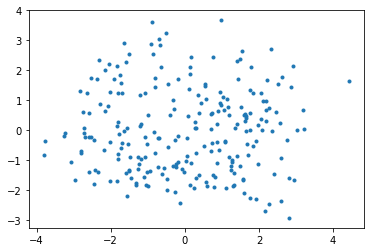

In [25]:
pca = PCA(n_components=2)
pca.fit(data)
X_pca = pca.transform(data)
plt.plot(X_pca[:,0],X_pca[:,1],'.')

In [26]:
qual = X_pca*X_pca
qual = (qual.T / qual.sum(axis=1)).T
qualite = pd.DataFrame(data=qual, columns=list(range(1,pca.n_components_+1)))
del qual
#qualite.add_prefix('CP_')
qualite.columns = ['CP_' + str(col) for col in qualite.columns]
qualite*100

,CP_1,CP_2
0,41.845040,58.154960
1,0.482491,99.517509
2,51.757108,48.242892
3,75.627926,24.372074
4,98.598969,1.401031
...,...,...
229,94.179193,5.820807
230,0.489421,99.510579
231,47.459760,52.540240
232,14.694000,85.306000


In [27]:
qualite.describe()

,CP_1,CP_2
count,234.000000,234.000000
mean,0.565364,0.434636
std,0.335526,0.335526
min,0.000516,0.000018
25%,0.271502,0.103343
50%,0.589555,0.410445
75%,0.896657,0.728498
max,0.999982,0.999484


In [28]:
np.set_printoptions(precision=2)
print("inerties :")
print(pca.explained_variance_*(pca.n_samples_-1),"(methode 1)")
print(pca.singular_values_**2,"(methode 2)")
#
print("inertie totale :")
print(np.sum(pca.explained_variance_*(pca.n_samples_-1)),"(methode 1)")
print(np.sum(pca.singular_values_**2),"(methode 2)")
np.set_printoptions(precision=4)
#
with np.printoptions(formatter={'float': '{: 7.3f}'.format}):
    print("pourcentages d'inertie :\n",pca.explained_variance_ratio_*100)
    print("pourcentages d'inertie cumulées:\n",np.cumsum(pca.explained_variance_ratio_)*100)

inerties :
[673.33 459.57] (methode 1)
[673.33 459.57] (methode 2)
inertie totale :
1132.9016575196833 (methode 1)
1132.9016575196833 (methode 2)
pourcentages d'inertie :
 [ 57.550  39.280]
pourcentages d'inertie cumulées:
 [ 57.550  96.829]


In [29]:
lesNouvellesCoordonnees = X_pca
corrOldNew = np.corrcoef(data.T,lesNouvellesCoordonnees.T)
corrOldNew = corrOldNew[0:len(nomDesVariables),len(df_pluie.columns):]
coordonneesDesVariables = pd.DataFrame(data=corrOldNew,
                                       index=nomDesVariables,
                                       columns=list(range(1,pca.n_components_+1)))
del corrOldNew
coordonneesDesVariables.columns = ['CP_' + str(col) for col in coordonneesDesVariables.columns]
coordonneesDesVariables

,CP_1,CP_2
$D_en$,0.960725,0.181666
$\sigma_Rn$,-0.857488,0.507285
$R_{\max}n$,-0.769940,0.606079
$P_{c1}n$,0.748584,0.648196
$R_dn$,0.256944,0.941353


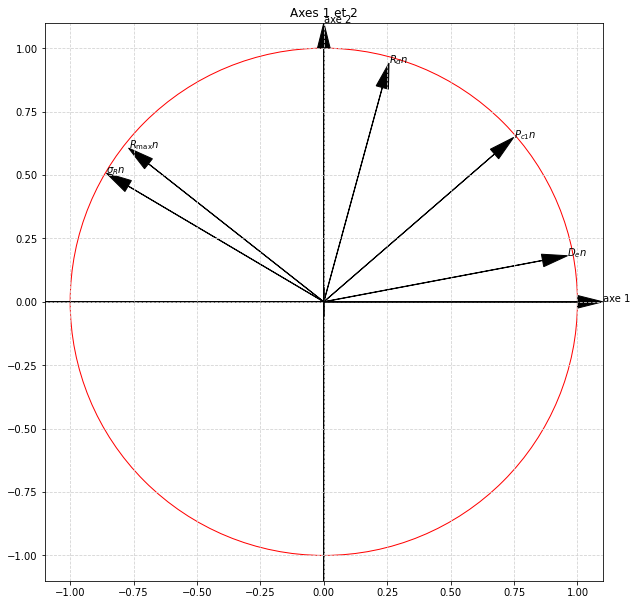

In [30]:
# coordonnees maximales de chacune des figures
x_lim = [-1.1,1.1]
y_lim = [-1.1,1.1]
cpt = 0
d=2
plt.subplots(figsize=(10,10*d))
for i in range(d-1):
    for j in range(i+1,d):
        cpt += 1
        ax = plt.subplot('{}{}{}'.format(int(d*(d-1)/2),1,cpt))
        # cercle unitaire
        cercle = plt.Circle((0,0),1,color='red',fill=False)
        ax.add_artist(cercle)
        #
        # projection du nuage des variables 
        for k in range(len(nomDesVariables)):
            ax.arrow(0, 0, coordonneesDesVariables.iloc[k,i], coordonneesDesVariables.iloc[k,j],length_includes_head=True, head_width=0.05, head_length=0.1, fc='k', ec='k')
            # Ornementation
            plt.text(coordonneesDesVariables.iloc[k,i], coordonneesDesVariables.iloc[k,j], nomDesVariables[k])#,fontsize=fontsize)
        plt.title('Axes {} et {}'.format(i+1,j+1))
        #
        # ajout d'une grille
        plt.grid(color='lightgray',linestyle='--')
        # Ajouter des deux axes correspondants aux axes factoriels
        ax.arrow(x_lim[0], 0, x_lim[1]-x_lim[0], 0,length_includes_head=True, head_width=0.05, head_length=0.1, fc='k', ec='k')
        plt.plot(plt.xlim(), np.zeros(2),'k-')
        plt.text(x_lim[1], 0, "axe {:d}".format(i+1))
        #
        ax.arrow(0, y_lim[0], 0, y_lim[1]-y_lim[0],length_includes_head=True, head_width=0.05, head_length=0.1, fc='k', ec='k')
        plt.plot(np.zeros(2),plt.ylim(),'k-')
        plt.text(0,y_lim[1], "axe {:d}".format(j+1))
        #        ax.set_ylim([-1.1, 1.1])
        ax.set_xlim(x_lim)
        ax.set_ylim(y_lim)
        ax.set_aspect('equal')
        

#### Une projection en 2D (TSNE)
(C'est rapide mais c'est l'idée.)

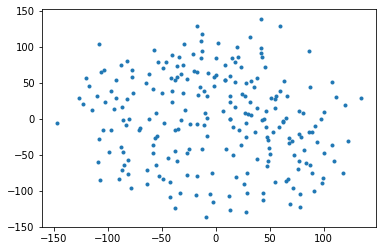

In [31]:
tsne = TSNE(n_components=3, init='pca', random_state=0)
X_tsne = tsne.fit_transform(data)
plt.plot(X_tsne[:,0],X_tsne[:,1],'.')

***
**On est jamais mieux servi que par soi-même.**  
**If you want something done right, do it yourself.**

[pandas](https://pandas.pydata.org/) - [Numpy and Scipy](https://docs.scipy.org/doc/) - [matplotlib](https://matplotlib.org/) - [scikit-learn](http://scikit-learn.org/stable/) - [seaborn](https://seaborn.pydata.org/)

In [32]:
#Kmeans

In [33]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn_extra.cluster import KMedoids
from scipy.spatial import distance

In [34]:
Data1 = pd.DataFrame(X_pca,columns=["Dim1","Dim2"])
import plotly.express as px
df = px.data.iris()
fig = px.scatter(Data1, x='Dim1', y='Dim2')
fig.show()

In [35]:
Data1.to_csv('2d_final.csv',index=None)

Text(0.5, 1.0, 'Données issues de trois gaussiennes')

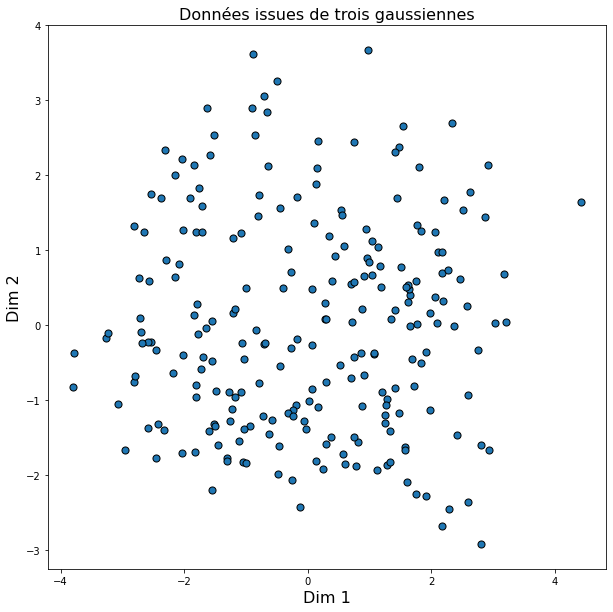

In [36]:
# affichage des points ayant servis pour adapter le modèle.
plt.figure(figsize=(10,10))
plt.scatter(Data1['Dim1'].values,Data1['Dim2'].values, edgecolor='k', s=50)
plt.xlabel('Dim 1',fontsize=16)
plt.ylabel('Dim 2',fontsize=16)
plt.title("Données issues de trois gaussiennes",
          fontsize=16)


In [37]:
k_means=KMeans(2)
k_means.fit(Data1)
k_means.labels_

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0], dtype=int32)

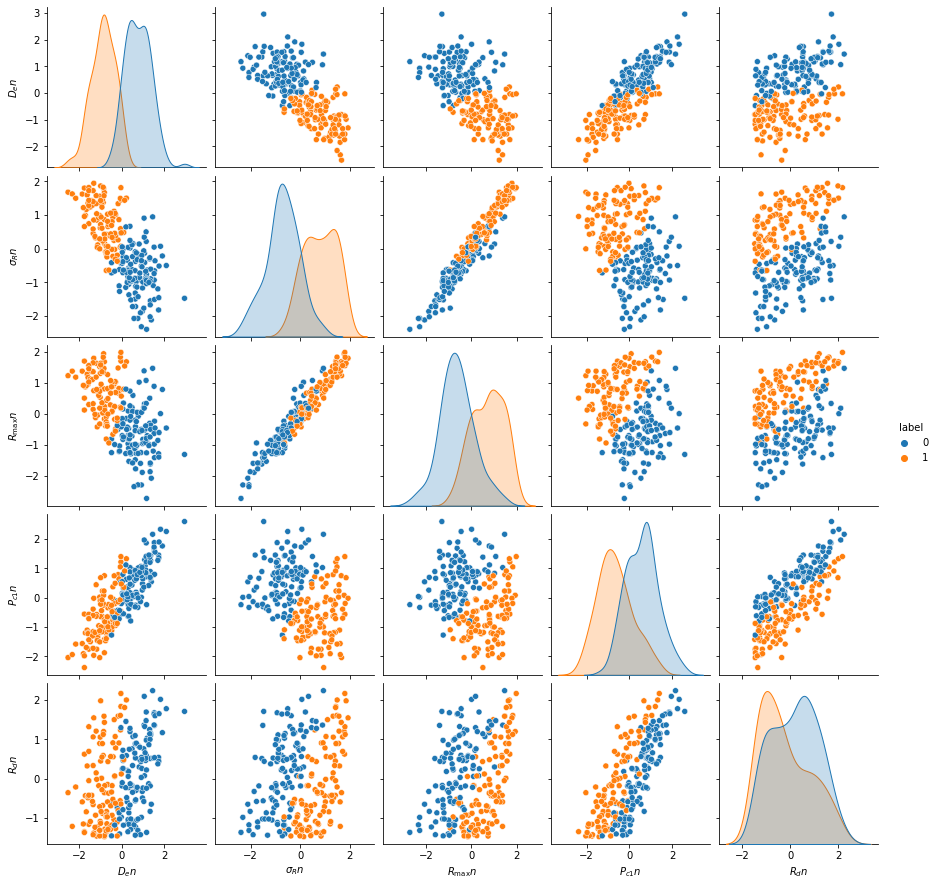

In [38]:
import seaborn as sns
df_pluie['label']=k_means.labels_
sns.pairplot(df_pluie,hue='label')

In [39]:
Data2 = pd.DataFrame(X_tsne,columns=['Dim1','Dim2','Dim3'])
Data2.to_csv('tsne.csv',index=None)

In [40]:
import plotly.express as px
df = px.data.iris()
fig = px.scatter_3d(Data2, x='Dim1', y='Dim2', z='Dim3',)
fig.show()


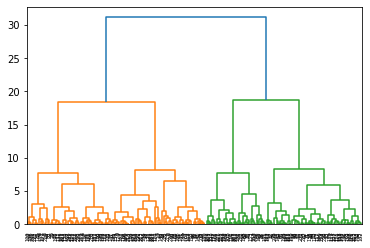

In [41]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(Data1, method='ward'))

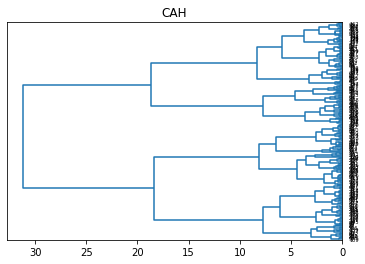

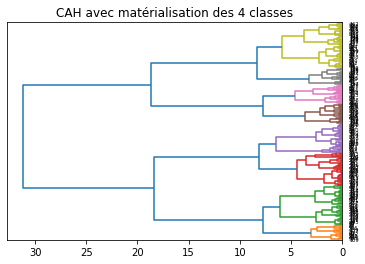

[1 2 2 1 1 1 1 1 1 1 1 1 2 1 1 2 2 2 2 1 1 1 1 2 1 1 2 1 1 1 1 2 2 2 2 1 1
 2 2 2 1 2 2 1 2 2 2 2 1 1 2 1 2 1 2 2 2 1 1 2 1 2 2 2 2 2 1 1 2 2 1 2 1 1
 1 2 1 2 1 2 1 1 2 1 1 2 2 2 1 2 1 2 1 1 2 1 1 1 2 1 2 1 2 2 1 2 1 1 1 1 1
 1 1 1 2 2 2 2 2 1 1 1 1 1 1 1 2 2 1 1 2 1 2 1 1 1 1 2 2 1 1 1 2 1 2 2 2 1
 2 1 1 1 2 2 1 1 1 1 1 2 1 1 2 2 2 2 1 1 2 2 2 1 2 2 1 2 1 2 2 2 1 2 2 1 1
 2 2 2 2 1 2 1 1 1 2 1 1 2 2 2 2 1 2 2 2 2 2 1 2 2 1 2 2 2 1 1 1 1 2 1 2 1
 1 1 2 1 1 2 1 1 1 1 1 1]
      0
1     0
1   121
1   122
1   123
1   124
..  ...
2    50
2   132
2   130
2   127
2   116

[234 rows x 1 columns]


In [42]:
#matérialisation des 4 classes (hauteur t = 7)
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage,fcluster

#générer la matrice des liens
Z = linkage(Data1,method='ward',metric='euclidean')
#affichage du dendrogramme
plt.title("CAH")
dendrogram(Z,labels=Data1.index,orientation='left',color_threshold=0)
plt.show()


plt.title('CAH avec matérialisation des 4 classes')
dendrogram(Z,labels=Data1.index,orientation='left',color_threshold=7)
plt.show()
#découpage à la hauteur t = 7 ==> identifiants de 4 groupes obtenus
groupes_cah = fcluster(Z,t=22,criterion='distance')
print(groupes_cah)
#index triés des groupes
import numpy as np
idg = np.argsort(groupes_cah)
#affichage des observations et leurs groupes
print(pd.DataFrame(Data1.index[idg],groupes_cah[idg]))